In [1]:
%load_ext autoreload
%autoreload 2

import MAIA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
acquisitions=[
    
'20211201_MouseBrain2_S11_306x248_Att30_25um',
'20211202_MouseBrain2_S12_332x246_Att30_25um',
'20211203_MouseBrain2_S13_319x262_Att30_25um',
'20211206_MouseBrain2_S14_354x299_Att30_25um',
'20211209_MouseBrain2_S15_359x281_Att30_25um',
'20220127_MouseBrain2_S16_398x303_Att30_25um',
'20220105_MouseBrain2_S17_395x294_Att32_25um',
'20220106_MouseBrain2_S18_393x309_Att32_25um',
'20211210_MouseBrain2_S19_423x320_Att32_25um',
'20220321_MouseBrain2_S20_Duplicate_443x313_Att30_25um',
'20211213_MouseBrain2_S21_412x360_Att30_25um',
'20220107_MouseBrain2_S22_417x310_Att32_25um',
'20220224_MouseBrain2_S23_427x319_Att30_25um',
'20220115_MouseBrain2_S24_427x322_Att30_25um',
'20220311_MouseBrain2_S25_duplicate_476x336_Att30_25um',
'20220120_MouseBrain2_S26_415x315_Att30_25um',
'20220122_MouseBrain2_S27_443x301_Att30_25um',
'20220125_MouseBrain2_S28_312x431_Att30_25um',
'20220126_MouseBrain2_S29_410x290_Att30_25um',
'20220111_MouseBrain2_S30_400x248_Att32_25um',
'20220124_MouseBrain2_S31_394x261_Att30_25um',
'20220130_MouseBrain2_S32_370x325_Att30_25um',
'20220201_MouseBrain2_S33_359x314_Att30_25um',
'20220203_MouseBrain2_S34_377x322_Att30_25um',
'20220210_MouseBrain2_S36_363x307_Att30_25um',
'20220207_MouseBrain2_S35_375x344_Att30_25um' ,
'20220213_MouseBrain2_S37_354x308_Att30_25um',
'20220216_MouseBrain2_S38_363x304_Att30_25um',
'20220225_MouseBrain2_S39_354x296_Att30_25um',
'20220308_MouseBrain2_S40_322x290_Att30_25um',
'20220303_MouseBrain2_S41_333x262_Att30_25um',
'20220222_MouseBrain2_S42_278x251_Att30_25um'    
]

NAME_FOLDER = '06062023_lipids'
PATH_DATA = f'/data/SV_DAngelo/Hannah/processedData/LBA/brain2/{NAME_FOLDER}'
PATH_MASKS = f'/data/SV_DAngelo/Hannah/processedData/LBA/brain2/masks'

In [3]:
x, masks = MAIA.utils.tools.read_images_masks(acquisitions,
                                        path_images=PATH_DATA, path_masks=PATH_MASKS,
                                        gaussian_smoothing=False, gaussian_sigma=0.3,
                                        log_transform=True, epsilon=0.0002
                                       )

[(38065,), (41422,), (54656,), (60931,), (64526,), (76053,), (76093,), (83021,), (83314,), (91811,), (102481,), (94747,), (99630,), (97487,), (96364,), (93469,), (83034,), (77033,), (69719,), (66209,), (64652,), (63936,), (55851,), (61017,), (66066,), (63215,), (61585,), (55253,), (52819,), (53335,), (47579,), (34195,)]


Loading Data: 202it [08:04,  2.40s/it]

Data Loaded Successfully.


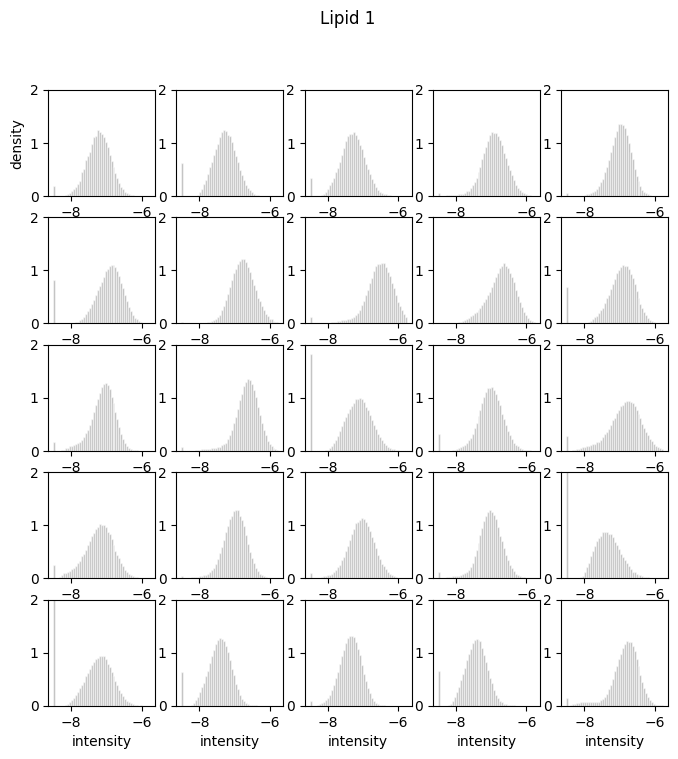

In [4]:
MAIA.vis.plot_intensity(x[:, :25, :], masks[:, :25, :], v=1, mz_val='Lipid 1')

In [5]:
init_state = MAIA.norm.initialize(x, masks, visualize=False, subsample=True)

GMM Initialization: 100%|██████████| 202/202 [00:19<00:00, 10.46it/s]
2023-09-13 17:30:37.466930: W external/xla/xla/service/gpu/nvptx_compiler.cc:698] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.2.128). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [6]:
import jax.numpy as jnp
COVARIATE_VECTOR = jnp.array([0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,
                              0,0,0,0,0,0,0,0,0,0,
                              0,0
                             ])

In [8]:
svi_result = MAIA.norm.normalize(x, 
                              masks,
                              init_state=init_state,
                              subsample=True,
                              optimizer=None,
                              num_steps=5000,
                              covariate_vector=COVARIATE_VECTOR,
                              )

[[[1 1 1 ... 1 1 1]
  [1 1 0 ... 1 1 1]
  [1 0 1 ... 1 1 0]
  ...
  [1 0 0 ... 0 1 1]
  [0 0 0 ... 0 1 1]
  [1 1 0 ... 0 1 0]]

 [[0 0 1 ... 1 0 1]
  [1 0 0 ... 0 1 1]
  [0 1 1 ... 1 1 1]
  ...
  [0 1 0 ... 1 0 0]
  [0 0 1 ... 1 0 0]
  [1 1 0 ... 1 0 0]]

 [[1 0 0 ... 0 0 0]
  [1 0 1 ... 1 1 1]
  [0 0 0 ... 1 0 0]
  ...
  [0 1 0 ... 1 1 1]
  [1 0 1 ... 0 0 1]
  [1 0 0 ... 0 0 1]]

 ...

 [[0 0 1 ... 0 1 1]
  [1 0 1 ... 0 0 1]
  [0 0 1 ... 0 1 1]
  ...
  [0 1 1 ... 0 1 1]
  [1 0 1 ... 0 0 0]
  [1 0 1 ... 1 0 0]]

 [[1 0 0 ... 1 0 1]
  [1 0 1 ... 1 0 1]
  [1 0 1 ... 1 1 0]
  ...
  [1 1 1 ... 0 0 0]
  [0 1 1 ... 1 1 0]
  [0 1 1 ... 1 1 1]]

 [[0 1 0 ... 1 0 1]
  [1 0 0 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [0 1 1 ... 0 1 1]
  [1 1 0 ... 1 0 0]
  [0 0 0 ... 0 1 0]]]
<class 'jaxlib.xla_extension.ArrayImpl'>
[[[0 0 1 ... 1 0 0]
  [0 0 0 ... 0 1 1]
  [1 0 1 ... 0 1 1]
  ...
  [0 0 1 ... 0 0 1]
  [1 1 0 ... 0 1 1]
  [0 1 0 ... 1 1 0]]

 [[0 1 1 ... 0 0 0]
  [0 0 1 ... 0 0 0]
  [0 0 1 ... 1 0 

UnexpectedTracerError: Encountered an unexpected tracer. A function transformed by JAX had a side effect, allowing for a reference to an intermediate value with type uint32[2] wrapped in a DynamicJaxprTracer to escape the scope of the transformation.
JAX transformations require that functions explicitly return their outputs, and disallow saving intermediate values to global state.
The function being traced when the value leaked was body_fn at /home/alireza/miniconda3/envs/myenv/lib/python3.11/site-packages/numpyro/infer/util.py:355 traced for while_loop.
------------------------------
The leaked intermediate value was created on line /home/alireza/MAIA/MAIA/normalization/_model.py:89:25 (model). 
------------------------------
When the value was created, the final 5 stack frames (most recent last) excluding JAX-internal frames were:
------------------------------
<frozen runpy>:198:11 (_run_module_as_main)
<frozen runpy>:88:4 (_run_code)
/tmp/ipykernel_667715/1828273283.py:1:13 (<module>)
/home/alireza/MAIA/MAIA/normalization/_normalize.py:72:17 (normalize)
/home/alireza/MAIA/MAIA/normalization/_model.py:89:25 (model)
------------------------------

To catch the leak earlier, try setting the environment variable JAX_CHECK_TRACER_LEAKS or using the `jax.checking_leaks` context manager.
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.UnexpectedTracerError